# ecog2vec

## Preprocess ECoG data 

Load in the .nwb files, save to .wav files with sr=16000 for compatibility with wav2vec.

In [1]:
'''
This cell takes raw ECoG data and writes the sentences to WAVE
files with 256 channels.
'''

# from nwbwidgets import nwb2widget
from pynwb import NWBHDF5IO
import numpy as np
import soundfile as sf
import os
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import butter, lfilter

def butterworth_bandpass(lowcut, highcut, sr, order=5):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [lowcut, highcut], btype='band', fs=sr)
    return b, a

def apply_butterworth_filter(data, b, a):
    num_channels = data.shape[1]
    filtered_data = np.empty_like(data)
    
    for i in range(num_channels):
        filtered_data[:, i] = lfilter(b, a, data[:, i])
        
    return filtered_data

patient = "EFC400"

folder_path = f"/NWB/{patient}/"
file_list = os.listdir(folder_path)
nwb_files = [file for file in file_list if file.startswith(f"{patient}")]

print(nwb_files)

# sr = 3051.7578125
sr = 400
high_gamma_min = 70
high_gamma_max = 199
high_gamma_scale = 1e3

b, a = butterworth_bandpass(high_gamma_min, high_gamma_max, sr)

for file in nwb_files:
    path = os.path.join(folder_path, file)
    
    io = NWBHDF5IO(path, load_namespaces=True, mode='r')
    nwbfile = io.read()

    nwbfile_electrodes = nwbfile.processing['ecephys'].data_interfaces['LFP'].electrical_series['preprocessed (bipolar)'].data[:]
    high_gamma = apply_butterworth_filter(nwbfile_electrodes, b, a)

    # print(nwbfile.acquisition['ElectricalSeries'].data[:].shape)
    
    starts = list(nwbfile.trials[:]['start_time'] * sr) # 3051.7578125
    stops = list(nwbfile.trials[:]['stop_time'] * sr)
    
    ### Get speaking segments only ###
    starts = [int(start) for start in starts]
    stops = [int(stop) for stop in stops]
    
    speaking_segments = [] # np.empty((1, 256))
    
    i = 0
    for start, stop in zip(starts, stops):
        speaking_segment = high_gamma[start:stop,:]
        if speaking_segment.shape[0] > 800: # 5000:
            file_name = f'/home/bayuan/Documents/fall23/ecog2vec/wav2vec_inputs/preprocessed_bipolar_clipped/{file}_{i}.wav'
            sf.write(file_name, speaking_segment[0:800,:], 16000)  # adjust as needed
            print(speaking_segment[0:800,:].shape)
        i = i + 1
    
        # speaking_segments.append(speaking_segment) # save as list of (x, 256) arrays
    
    # print(len(speaking_segments)) # this should be the number of sentences
    # speaking_segments = np.vstack(speaking_segments) # stack the list 
    # print(speaking_segments.shape)
    ##################################
    
    
    ##################################
    # This section splits large nwb files up
    # into chunks to save to wave files
    # chunk_size = 100000

    # num_full_chunks = len(speaking_segments) // chunk_size
    # # last_chunk_size = len(nwbfile_electrodes) % chunk_size

    # full_chunks = np.split(speaking_segments[:num_full_chunks * chunk_size], num_full_chunks)
    # last_chunk = speaking_segments[num_full_chunks * chunk_size:]

    # chunks = full_chunks # + [last_chunk] omit the last non-100000 chunk

    # # for chunk in chunks:
    # #     print(chunk.shape)

    # # Loop through the chunks and save them as WAV files
    # for i, chunk in enumerate(chunks):
    #     file_name = f'/home/bayuan/Documents/fall23/ecog2vec/ecog_speakonly/EFC400/{file}_{i}.wav' # CHANGE FOR EACH SUBJECT
    #     sf.write(file_name, chunk, 16000)  # adjust as needed

['EFC400_B57.nwb', 'EFC400_B72.nwb', 'EFC400_B28.nwb', 'EFC400_B30.nwb', 'EFC400_B14.nwb', 'EFC400_B23.nwb', 'EFC400_B38.nwb', 'EFC400_B6.nwb', 'EFC400_B40.nwb', 'EFC400_B12.nwb', 'EFC400_B42.nwb', 'EFC400_B4.nwb', 'EFC400_B3.nwb', 'EFC400_B19.nwb', 'EFC400_B8.nwb', 'EFC400_B15.nwb', 'EFC400_B46.nwb', 'EFC400_B10.nwb', 'EFC400_B61.nwb']


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)
(800, 480)


[[ 4.5702705e-05  1.3210182e-05 -1.6215210e-05 ... -1.6877606e-05
   1.5747741e-05  3.0572694e-05]
 [-7.1754694e-05 -1.9035864e-05  2.4024448e-05 ...  2.2636992e-05
  -2.3315679e-05 -5.6546978e-05]
 [-8.0912192e-05 -2.5631360e-05  2.8363971e-05 ...  3.5749468e-05
  -2.7899729e-05 -4.5865898e-05]
 ...
 [ 5.0836966e-06  4.4456515e-06 -6.3271332e-06 ... -2.7217527e-07
   6.3711159e-06  3.3715965e-05]
 [-2.5650641e-06  8.3576771e-07 -1.4129680e-06 ... -6.4393498e-07
  -3.0702654e-06  2.4212621e-05]
 [ 1.2907755e-06 -5.8224755e-06  5.6694421e-07 ... -3.5263741e-07
  -3.6769393e-07  2.2469349e-05]]
(147639, 480)


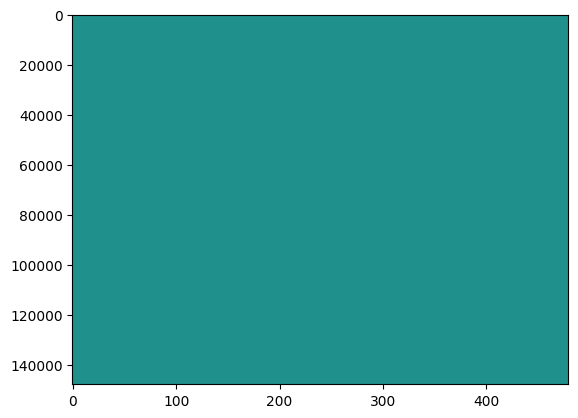

In [2]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

norm = LogNorm(vmin=high_gamma.min(), vmax=high_gamma.max())
print(high_gamma)
print(high_gamma.shape)
imshow(high_gamma, aspect='auto')

[[ 4.44832722e-06 -2.16573267e-06 -4.57530541e-06 ... -4.24845030e-06
   2.34829849e-06 -8.66867776e-06]
 [ 6.65936659e-06 -5.96448899e-06 -8.33081049e-06 ... -6.70036252e-06
   5.92974402e-06 -1.89919956e-05]
 [ 1.12496423e-06 -5.81686800e-06  9.92932087e-07 ... -4.64037043e-07
   6.29791748e-06 -2.08921265e-05]
 ...
 [ 5.34665151e-06  4.02769911e-06 -6.50839911e-06 ...  7.48897855e-06
  -1.09435960e-05  7.29312433e-06]
 [ 4.93839525e-06  3.03161437e-06 -4.35317770e-06 ...  1.00107300e-05
  -1.54159534e-05  1.31701945e-05]
 [ 4.87320767e-06  8.18275282e-07 -4.00282488e-06 ...  6.70065720e-06
  -1.18994449e-05  1.30676353e-05]]
(120728, 480)


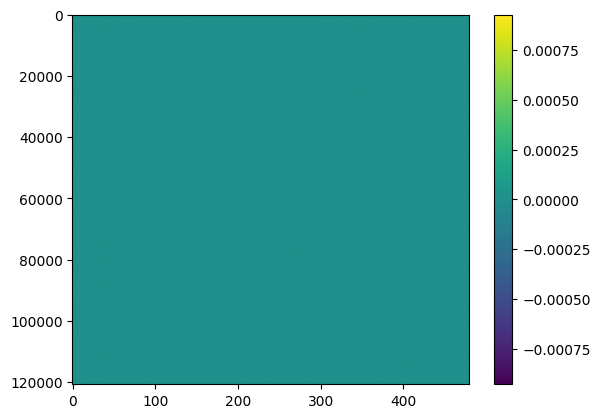

In [8]:
print(nwbfile_electrodes)
print(nwbfile_electrodes.shape)
imshow(nwbfile_electrodes,  aspect='auto')
plt.colorbar()

In [10]:
'''
This cell takes preprocessed ECoG data and writes the sentences to 
WAVE files with 480 channels.
'''

# from nwbwidgets import nwb2widget
from pynwb import NWBHDF5IO
import numpy as np
import soundfile as sf
import os

# path = '/NWB/EFC400/EFC400_B72.nwb' # CHANGE FOR EACH SUBJECT

# Open the NWB file for reading
# with NWBHDF5IO(path, 'r') as io:
#     nwb_file = io.read()

folder_path = "/NWB/EFC400/"
file_list = os.listdir(folder_path)
nwb_files = [file for file in file_list if file.startswith("EFC400")]

print(nwb_files)

for file in nwb_files:
    path = os.path.join(folder_path, file)
    
    io = NWBHDF5IO(path, load_namespaces=True, mode='r')
    nwbfile = io.read()

    nwbfile_electrodes = nwbfile.processing['ecephys'].data_interfaces['LFP'].electrical_series['preprocessed (bipolar)'].data[:]
    # print(nwbfile.acquisition['ElectricalSeries'].data[:].shape)
    
    starts = list(nwbfile.trials[:]['start_time']*400)
    stops = list(nwbfile.trials[:]['stop_time']*400)
    
    ### Get speaking segments only ###
    starts = [int(start) for start in starts]
    stops = [int(stop) for stop in stops]
    
    speaking_segments = [] # np.empty((1, 256))
    
    i = 0
    for start, stop in zip(starts, stops):
        speaking_segment = nwbfile_electrodes[start:stop,:]
        # if speaking_segment.shape[0] > 0: # 5000:
        file_name = f'/home/bayuan/Documents/fall23/ecog2vec/ecog_preprocessed_fullsentences/EFC400/{file}_{i}.wav'
        sf.write(file_name, speaking_segment, 16000)  # adjust as needed
        i = i + 1
        
        # speaking_segments.append(speaking_segment) # save as list of (x, 256) arrays
    
    # print(len(speaking_segments)) # this should be the number of sentences
    # speaking_segments = np.vstack(speaking_segments) # stack the list 
    # print(speaking_segments.shape)
    ##################################
    
    
    ##################################
    # This section splits large nwb files up
    # into chunks to save to wave files
    # chunk_size = 100000

    # num_full_chunks = len(speaking_segments) // chunk_size
    # # last_chunk_size = len(nwbfile_electrodes) % chunk_size

    # full_chunks = np.split(speaking_segments[:num_full_chunks * chunk_size], num_full_chunks)
    # last_chunk = speaking_segments[num_full_chunks * chunk_size:]

    # chunks = full_chunks # + [last_chunk] omit the last non-100000 chunk

    # # for chunk in chunks:
    # #     print(chunk.shape)

    # # Loop through the chunks and save them as WAV files
    # for i, chunk in enumerate(chunks):
    #     file_name = f'/home/bayuan/Documents/fall23/ecog2vec/ecog_speakonly/EFC400/{file}_{i}.wav' # CHANGE FOR EACH SUBJECT
    #     sf.write(file_name, chunk, 16000)  # adjust as needed

['EFC400_B57.nwb', 'EFC400_B72.nwb', 'EFC400_B28.nwb', 'EFC400_B30.nwb', 'EFC400_B14.nwb', 'EFC400_B23.nwb', 'EFC400_B38.nwb', 'EFC400_B6.nwb', 'EFC400_B40.nwb', 'EFC400_B12.nwb', 'EFC400_B42.nwb', 'EFC400_B4.nwb', 'EFC400_B3.nwb', 'EFC400_B19.nwb', 'EFC400_B8.nwb', 'EFC400_B15.nwb', 'EFC400_B46.nwb', 'EFC400_B10.nwb', 'EFC400_B61.nwb']


/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namesp

In [ ]:
nwbfile.trials[:]

In [9]:
# filepath = '/home/bayuan/Documents/fall23/ecog2vec/wav2vec_inputs/preprocessed_bipolar_clipped/EFC400_B40.nwb_15.wav'
filepath = '/home/bayuan/Documents/fall23/ecog2vec/wav2vec_inputs/preprocessed_bipolar_clipped/EFC401_B17.nwb_35.wav'

import soundfile as sf
wav, _ = sf.read(filepath)
print(wav.shape)

(800, 480)


## Train wav2vec on ecog data

Create a training manifest from the dataset. Train the model with 256-channel inputs

In [10]:
!python3 /home/bayuan/Documents/fall23/fairseq/examples/wav2vec/wav2vec_manifest.py \
    /home/bayuan/Documents/fall23/ecog2vec/wav2vec_inputs/preprocessed_bipolar_clipped \
  --dest /home/bayuan/Documents/fall23/ecog2vec/manifest \
  --ext wav \
  --valid-percent 0.01 \
  --seed 42

In [11]:
!python3 -c 'import argparse; print(argparse.__file__)'
!python3 /home/bayuan/Documents/fall23/fairseq/train.py \
    /home/bayuan/Documents/fall23/ecog2vec/manifest \
  --save-dir /home/bayuan/Documents/fall23/ecog2vec/model \
  --num-workers 6 --fp16 --max-update 400000 --save-interval 1 --infonce --no-epoch-checkpoints \
  --arch wav2vec --task audio_pretraining --min-lr 1e-06 --stop-min-lr 1e-09 --optimizer adam --lr 0.00005 --lr-scheduler cosine \
  --conv-feature-layers "[(512, 10, 5), (512, 8, 4), (512, 4, 2), (512, 4, 2), (512, 4, 2), (512, 1, 1), (512, 1, 1)]" \
  --conv-aggregator-layers "[(512, 2, 1), (512, 3, 1), (512, 4, 1), (512, 5, 1), (512, 6, 1), (512, 7, 1), (512, 8, 1), (512, 9, 1), (512, 10, 1), (512, 11, 1), (512, 12, 1), (512, 13, 1)]" \
  --skip-connections-agg --residual-scale 0.5 --log-compression --warmup-updates 500 --warmup-init-lr 1e-07 --num-negatives 10 \
  --max-sample-size 1500000 --skip-invalid-size-inputs-valid-test  --batch-size 50 --max-tokens 150000000 \
  --tensorboard-logdir /home/bayuan/Documents/fall23/ecog2vec/runs --prediction-steps 1 --criterion wav2vec

/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/argparse.py
2023-11-07 15:29:46 | INFO | fairseq_cli.train | Args: 
2023-11-07 15:29:46 | INFO | fairseq.models.wav2vec.wav2vec | Wav2VecModel(
  (feature_extractor): ConvFeatureExtractionModel(
    (conv_layers): ModuleList(
      (0): Sequential(
        (0): Conv1d(480, 512, kernel_size=(10,), stride=(5,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (1): Sequential(
        (0): Conv1d(512, 512, kernel_size=(8,), stride=(4,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (2-4): 3 x Sequential(
        (0): Conv1d(512, 512, kernel_size=(4,), stride=(2,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (5-6): 2 x Sequential(
        (0

In [3]:
# simplified the model

!python3 -c 'import argparse; print(argparse.__file__)'
!python3 /home/bayuan/Documents/fall23/fairseq/train.py \
    /home/bayuan/Documents/fall23/ecog2vec/manifest \
  --save-dir /home/bayuan/Documents/fall23/ecog2vec/model \
  --num-workers 6 --fp16 --max-update 400000 --save-interval 1 --infonce --no-epoch-checkpoints \
  --arch wav2vec --task audio_pretraining --min-lr 1e-06 --stop-min-lr 1e-09 --optimizer adam --lr 0.0001 --lr-scheduler cosine \
  --conv-feature-layers "[(512, 4, 1), (512, 1, 1)]" \
  --conv-aggregator-layers "[(512, 2, 1), (512, 3, 1), (512, 4, 1), (512, 5, 1)]" \
  --skip-connections-agg --residual-scale 0.5 --log-compression --warmup-updates 500 --warmup-init-lr 1e-07 --num-negatives 10 \
  --max-sample-size 1500000 --skip-invalid-size-inputs-valid-test  --batch-size 50 --max-tokens 150000000 \
  --tensorboard-logdir /home/bayuan/Documents/fall23/ecog2vec/runs --prediction-steps 2 --criterion wav2vec

/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/argparse.py
2023-11-07 22:02:17 | INFO | fairseq_cli.train | Args: 
2023-11-07 22:02:17 | INFO | fairseq.models.wav2vec.wav2vec | Wav2VecModel(
  (feature_extractor): ConvFeatureExtractionModel(
    (conv_layers): ModuleList(
      (0): Sequential(
        (0): Conv1d(480, 512, kernel_size=(4,), stride=(1,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (1): Sequential(
        (0): Conv1d(512, 512, kernel_size=(1,), stride=(1,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
    )
  )
  (feature_aggregator): ConvAggegator(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): ReplicationPad1d((1, 0))
        (1): Conv1d(512, 512, kernel_size=(2,), stride=(1,))
        (2): Dropout(p=0.0, inplace=False)
        (3): Fp32GroupNorm(

In [1]:
# simplified the model even more

!python3 -c 'import argparse; print(argparse.__file__)'
!python3 /home/bayuan/Documents/fall23/fairseq/train.py \
    /home/bayuan/Documents/fall23/ecog2vec/manifest \
  --save-dir /home/bayuan/Documents/fall23/ecog2vec/model \
  --num-workers 6 --fp16 --max-update 400000 --save-interval 1 --infonce --no-epoch-checkpoints \
  --arch wav2vec --task audio_pretraining --min-lr 1e-06 --stop-min-lr 1e-09 --optimizer adam --lr 0.0001 --lr-scheduler cosine \
  --conv-feature-layers "[(512, 7, 2), (512, 3, 2)]" \
  --conv-aggregator-layers "[(512, 5, 1), (512, 10, 1)]" \
  --skip-connections-agg --residual-scale 0.5 --log-compression --warmup-updates 500 --warmup-init-lr 1e-07 --num-negatives 10 \
  --max-sample-size 1500000 --skip-invalid-size-inputs-valid-test  --batch-size 50 --max-tokens 150000000 \
  --tensorboard-logdir /home/bayuan/Documents/fall23/ecog2vec/runs --prediction-steps 12 --criterion wav2vec

/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/argparse.py
2023-11-07 21:22:50 | INFO | fairseq_cli.train | Args: 
2023-11-07 21:22:50 | INFO | fairseq.models.wav2vec.wav2vec | Wav2VecModel(
  (feature_extractor): ConvFeatureExtractionModel(
    (conv_layers): ModuleList(
      (0): Sequential(
        (0): Conv1d(480, 512, kernel_size=(7,), stride=(2,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (1): Sequential(
        (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
    )
  )
  (feature_aggregator): ConvAggegator(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): ReplicationPad1d((4, 0))
        (1): Conv1d(512, 512, kernel_size=(5,), stride=(1,))
        (2): Dropout(p=0.0, inplace=False)
        (3): Fp32GroupNorm(

## Extract embeddings

Load the model, and extract the $c$ vectors from each .nwb file. Perform some analysis.

In [2]:
import torch
import fairseq
# from scipy.io import wavfile
import os
import soundfile as sf

cp_path = '/home/bayuan/Documents/fall23/ecog2vec/model/checkpoint_best.pt'#'/path/to/wav2vec.pt'
model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([cp_path])
model = model[0]
model.eval()

dir_path = '/home/bayuan/Documents/fall23/ecog2vec/wav2vec_inputs/preprocessed_bipolar'

for file in os.listdir(dir_path):

    wav_path = str(os.path.join(dir_path, file))

    wav_input_16khz, sr = sf.read(wav_path)
    wav_input_16khz = wav_input_16khz.T
    wav_input_16khz = wav_input_16khz.reshape(1, 480, -1) # change to 256; 480

    wav_input_16khz = torch.from_numpy(wav_input_16khz).to(torch.float)
    # print(wav_input_16khz.shape)

    # print(sr, wav_input_16khz.shape)
    z = model.feature_extractor(wav_input_16khz)
    c = model.feature_aggregator(z)
    
    torch.save(c, f"/home/bayuan/Documents/fall23/ecog2vec/wav2vec_outputs/preprocessed_bipolar_simpler/{file}.pt")

2023-11-07 21:31:17 | INFO | fairseq.models.wav2vec.wav2vec | Wav2VecModel(
  (feature_extractor): ConvFeatureExtractionModel(
    (conv_layers): ModuleList(
      (0): Sequential(
        (0): Conv1d(480, 512, kernel_size=(7,), stride=(2,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
      (1): Sequential(
        (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (3): ReLU()
      )
    )
  )
  (feature_aggregator): ConvAggegator(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): ReplicationPad1d((4, 0))
        (1): Conv1d(512, 512, kernel_size=(5,), stride=(1,))
        (2): Dropout(p=0.0, inplace=False)
        (3): Fp32GroupNorm(1, 512, eps=1e-05, affine=True)
        (4): ReLU()
      )
      (1): Sequential(
        (0): ReplicationPad1d((9, 0

In [2]:
import torch

# cc = torch.load('/home/bayuan/Documents/fall23/ecog2vec/wav2vec_outputs/latent_representations/EFC400/EFC400_B3.nwb_0.wav.pt')
cc = torch.load('/home/bayuan/Documents/fall23/ecog2vec/wav2vec_outputs/preprocessed_bipolar/EFC401_B4.nwb_0.wav.pt')

print(cc.shape)
print(cc)

torch.Size([1, 512, 1545])
tensor([[[0.6771, 0.1435, 0.0000,  ..., 0.8390, 0.8269, 0.7728],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.4407, 0.0785, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.5823, 2.2692],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
       requires_grad=True)


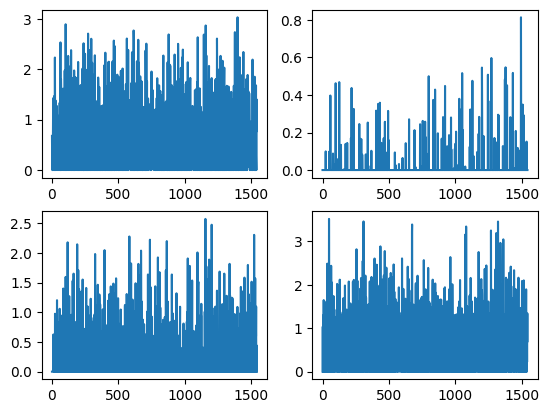

In [3]:
import matplotlib.pyplot as plt
cc = cc[0].detach().numpy()

fig, ax = plt.subplots(2,2)


ax[0,0].plot(cc[0])
ax[0,1].plot(cc[1])
ax[1,0].plot(cc[2])
ax[1,1].plot(cc[3])

# plt.imshow(cc)
# ax[0,1].set_xlim(0,29)

# data = [
#     (98.760, 101.110, "Are your grades higher or lower than Nancy"),
#     (103.185, 105.510, "Beg that guard for one gallon of petrol"),
#     (107.635, 109.150, "Alfalfa is healthy for you"),
#     (111.530, 114.185, "Young people participate in athletic activities"),
#     (116.295, 117.720, "Is this seesaw safe"),
#     (119.940, 121.595, "Carl lives in a lively home"),
#     (123.825, 126.875, "She wore warm fleecy woolen overalls"),
#     (128.930, 131.170, "Bright sunshine shimmers on the ocean"),
# ]

# for start, stop, transcription in data:
#     ax[1,1].barh(transcription, width=stop - start, left=start, height=0.5, label=transcription)

# ax[1,1].set_xlim(98.316, 131.088)
# fig.delaxes(ax[1, 0])


# look at aud wav; what if we are picking up someone speaking

In [ ]:
from pynwb import NWBHDF5IO
import numpy as np
import soundfile as sf
import os
import pandas as pd

path = '/NWB/EFC400/EFC400_B3.nwb'
io = NWBHDF5IO(path, load_namespaces=True, mode='r')
nwbfile = io.read()
nwbfile
# print(nwbfile.acquisition['ElectricalSeries'].data[:].shape)
# start = list(nwbfile.trials[:]['start_time'])
# stop = list(nwbfile.trials[:]['stop_time'])
# df = pd.DataFrame(nwbfile.trials[:]['start_time'])
# df.loc[3, 'start_time']
# df

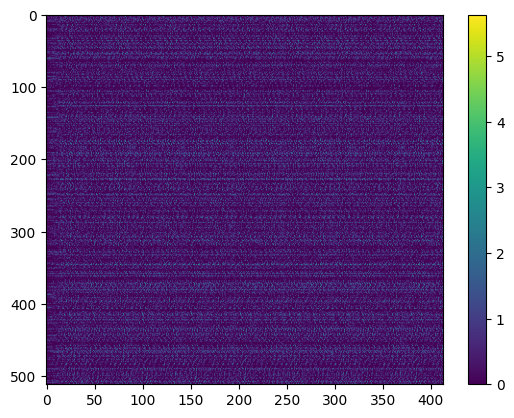

In [22]:
plt.imshow(cc, aspect='auto')
# print(cc[0][0].shape)
# print(cc[0][1].shape)
plt.colorbar()